In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('shopping_behavior_updated.csv')

In [3]:
df.head(7)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

#### Missing values:
There are no missing values in any of columns.

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
df.describe(include='object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


# Demographic Analysis:

- Explore the distribution of customers based on age and gender.
- Identify the most common age group among customers.
- Analyze whether there are gender-based preferences in terms of product categories or purchase amounts.

In [7]:
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['below 20', '20-29', '30-39', '40-49', '50-59', '60-69', '70 above']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

## Distribution of customers based on age and gender.

### Age distribution.

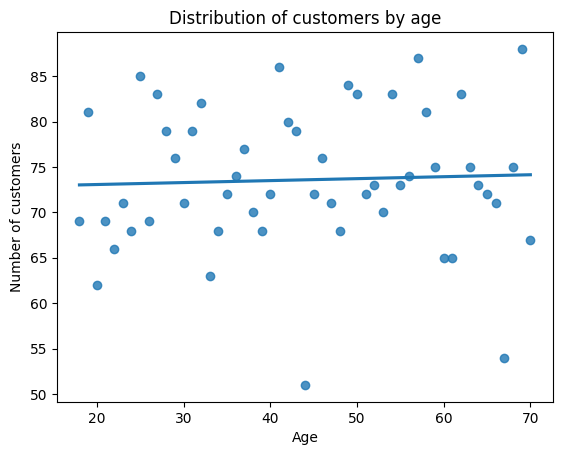

In [95]:
df1 = df.groupby('Age').count()
sns.regplot(data=df1, x=df1.index, y='Customer ID', ci=None)
plt.title('Distribution of customers by age')
plt.ylabel('Number of customers')
plt.show()

The age range of the customers appears to be nearly evenly spread, with the majority being slightly older.

### Gender distribution

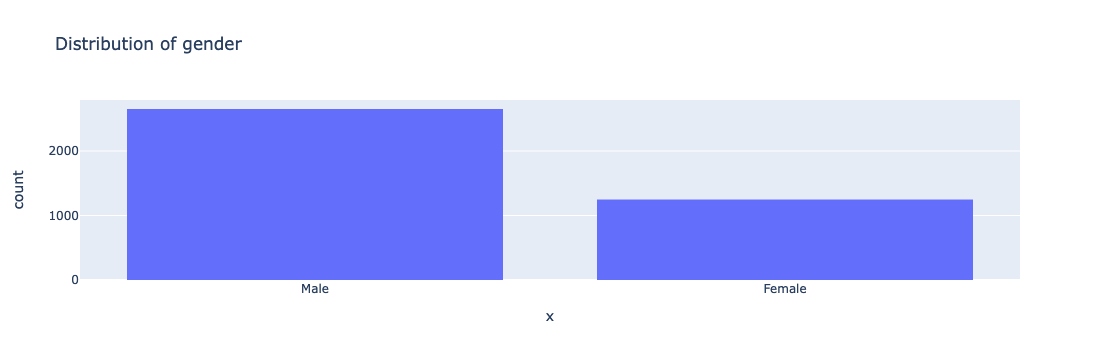

In [96]:
px.histogram(x=df['Gender'], title='Distribution of gender')

The data seems to be skewed, there are more males than female.

# Most common age groups

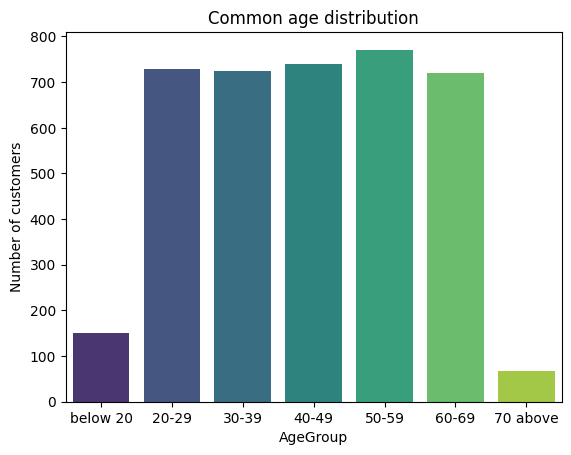

In [97]:
sns.countplot(x='AgeGroup',data=df, palette='viridis')
plt.title('Common age distribution')
plt.ylabel('Number of customers')
plt.show()

The most common group is between 50 to 60 years old

## Gender based preferences in terms of product categories.

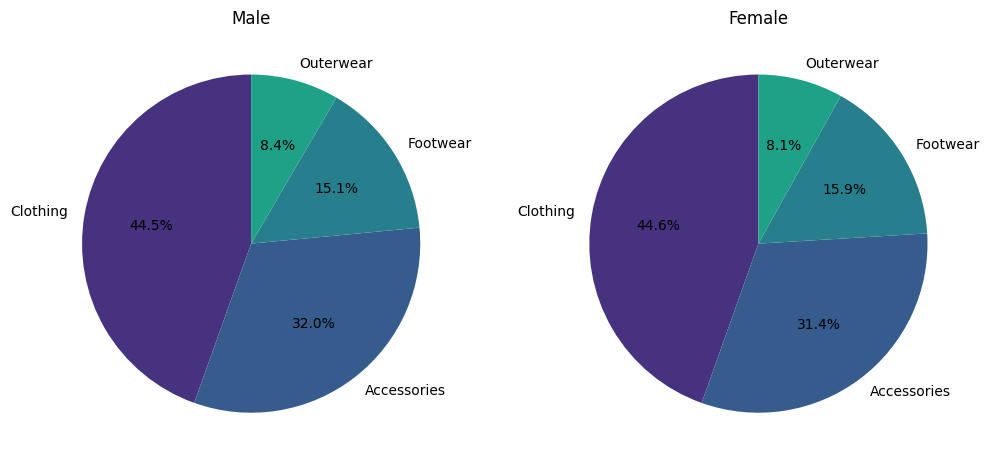

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for idx, gender in enumerate(df['Gender'].unique()):
    subset = df[df['Gender'] == gender]
    category_counts = subset['Category'].value_counts()
    
    axes[idx].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
    axes[idx].set_title(gender)

plt.show()


Preference of both genders seems to be the same for all the products in by the catorigies.

# Product Preferences:

- Identify the most purchased items and categories.
- Analyze the distribution of product preferences across different age groups and genders.
- Investigate whether there are seasonal trends in product preferences.

## Most Purchased Items and Categories:

### Categories

<bound method Axes.set of <Axes: title={'center': 'Purchased items by category'}, xlabel='Category', ylabel='Number of purchases'>>

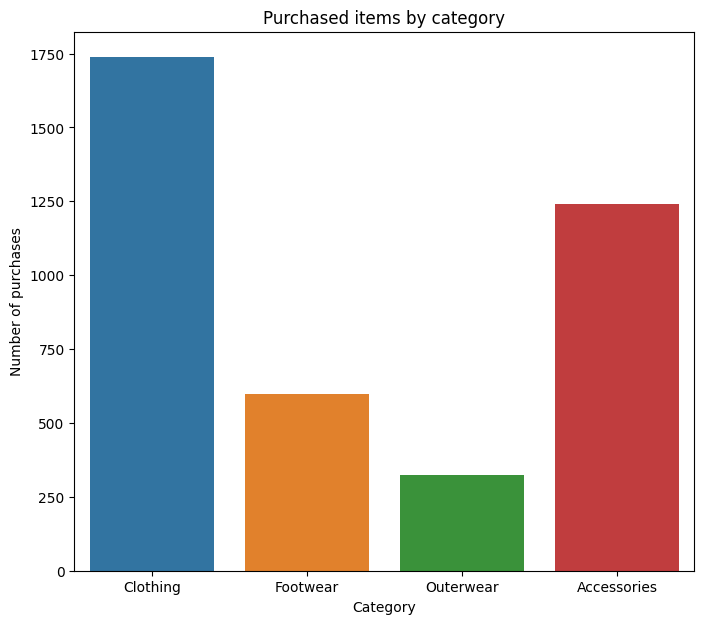

In [103]:
plt.figure(figsize=(8, 7))
ax = sns.countplot(x='Category', data=df)
ax.set_title('Purchased items by category')
ax.set_ylabel('Number of purchases')
ax.set

Clothes makes up the largest portion of the things that were bought, followed by accessories.

### Purchased items

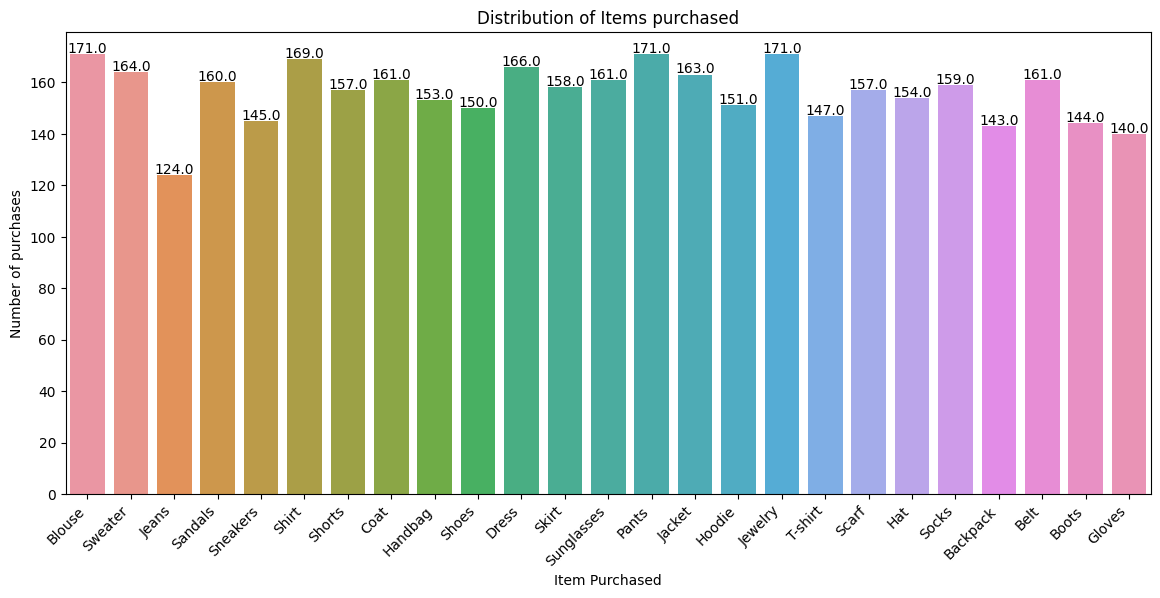

In [107]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='Item Purchased', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')
ax.set_ylabel('Number of purchases')
plt.title('Distribution of Items purchased')
plt.show()

#### Insights

Jewelry ,blouse and pants are the most popular items, with the same amount of purchases(171) made of each. 
Shirts are the second most popular item with 169 purchases made, followed by dresses with 166.

## Distribution of product preferences across different age groups and genders.

### Distribution of Product Preferences Across Age Groups

In [120]:
age_group = df['AgeGroup'].unique()

for i,age in enumerate(age_group):
    subset = df[df['AgeGroup'] == age]
    print(age)
    top_items = subset.groupby('Item Purchased')['AgeGroup'].count().sort_values(ascending=False)[:1]
    print(top_items)
    print('')

50-59
Item Purchased
Blouse    42
Name: AgeGroup, dtype: int64

below 20
Item Purchased
Coat    11
Name: AgeGroup, dtype: int64

20-29
Item Purchased
Skirt    37
Name: AgeGroup, dtype: int64

40-49
Item Purchased
Jacket    41
Name: AgeGroup, dtype: int64

60-69
Item Purchased
Jewelry    42
Name: AgeGroup, dtype: int64

30-39
Item Purchased
Jewelry    40
Name: AgeGroup, dtype: int64

70 above
Item Purchased
Socks    7
Name: AgeGroup, dtype: int64



Jewerly and blouse are the most sold product and they are popular in the age groups 60-69 and 50-59 respectively.

In [ ]:
visual analyses

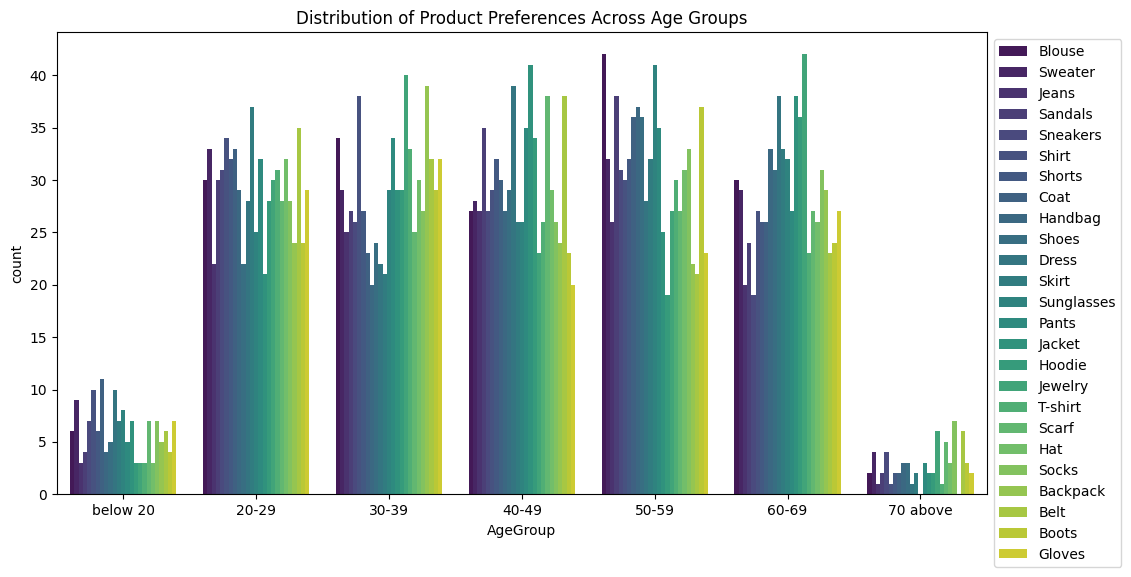

In [110]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='AgeGroup', hue='Item Purchased', data=df,palette= 'viridis', dodge=True)
plt.title('Distribution of Product Preferences Across Age Groups')
plt.ylabel('Number of purchases')
plt.legend(loc = 'best', bbox_to_anchor = (1,1))
plt.show()

### Distribution of Product Preferences Across Gender

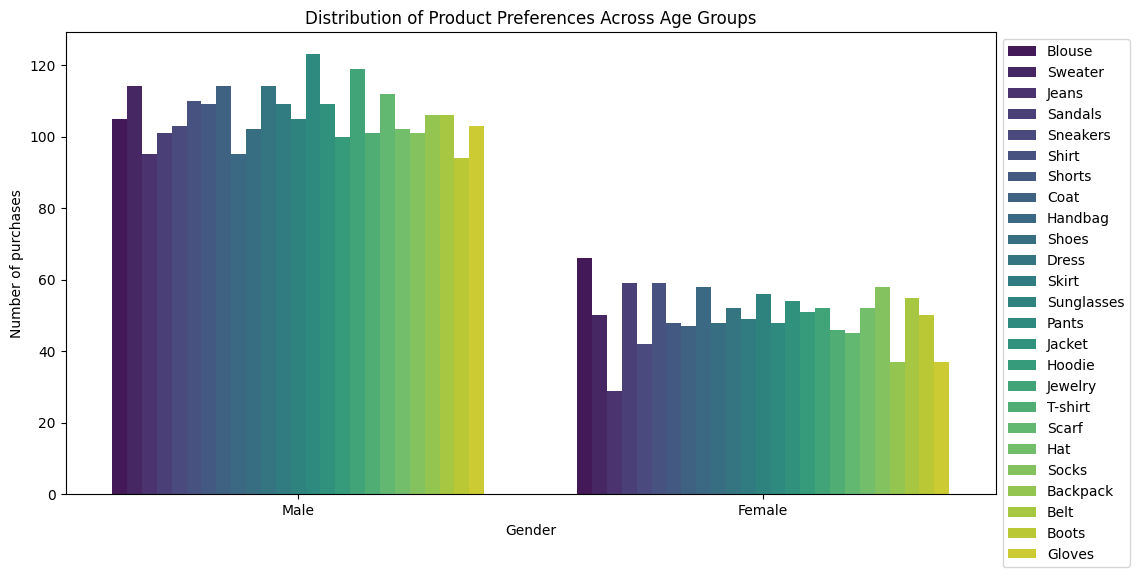

In [111]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Gender', hue='Item Purchased', data=df,palette= 'viridis', dodge=True)
plt.title('Distribution of Product Preferences Across Age Groups')
plt.ylabel('Number of purchases')
plt.legend(loc = 'best', bbox_to_anchor = (1,1))
plt.show()

In [ ]:
Blouse is the most popular product in the female category. Pants are most popular in the male category.

## Seasonal trends
- Investigate whether there are seasonal trends in product preferences.

### Top items by season

In [16]:
seasons = df['Season'].unique()

for i,season in enumerate(seasons):
    subset = df[df['Season'] == season]
    print(season)
    top_items = subset.groupby('Item Purchased')['Season'].count().sort_values(ascending=False)[:5]
    print(top_items)
    print('')

Winter
Item Purchased
Sunglasses    52
Pants         51
Shirt         50
Hoodie        48
Jewelry       47
Name: Season, dtype: int64

Spring
Item Purchased
Sweater    52
Shorts     47
Blouse     46
Coat       46
Skirt      46
Name: Season, dtype: int64

Summer
Item Purchased
Pants       50
Jewelry     47
Dress       47
Shoes       46
Backpack    45
Name: Season, dtype: int64

Fall
Item Purchased
Jacket     54
Hat        50
Handbag    48
Skirt      46
Sandals    44
Name: Season, dtype: int64



### Bottom items by season

In [17]:
for i,season in enumerate(seasons):
    subset = df[df['Season'] == season]
    print(season)
    top_items = subset.groupby('Item Purchased')['Season'].count().sort_values(ascending=False)[-5:]
    print(top_items)
    print('')

Winter
Item Purchased
Gloves      32
Sandals     32
Boots       31
Jeans       29
Backpack    25
Name: Season, dtype: int64

Spring
Item Purchased
Jacket        35
Sunglasses    33
Pants         32
Jeans         32
Hat           27
Name: Season, dtype: int64

Summer
Item Purchased
Jeans      31
T-shirt    30
Gloves     29
Skirt      28
Sweater    28
Name: Season, dtype: int64

Fall
Item Purchased
Coat        34
Backpack    34
Jeans       32
Sneakers    31
Shoes       26
Name: Season, dtype: int64



#### Insights

Some products that rank highly in one season are also observed to perform poorly in another. Sunglasses and pants, for example, were among the best-selling items in the winter but fell into the bottom 5 in the spring. 

### Visualisation

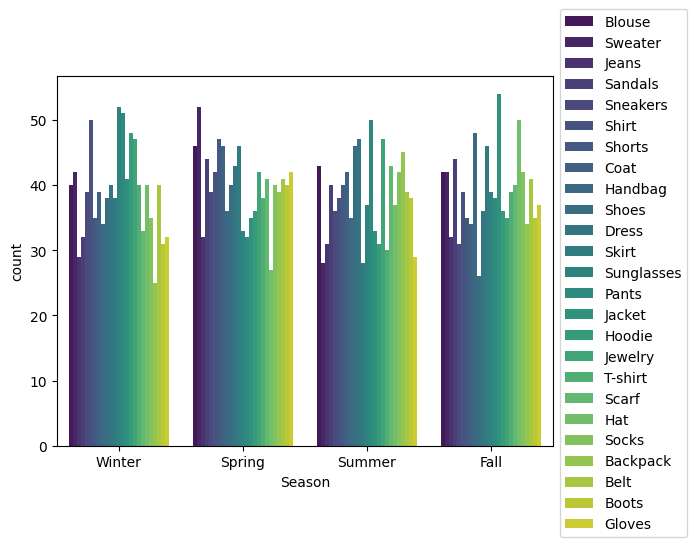

In [18]:
sns.countplot(data = df, hue = 'Item Purchased', x = 'Season', palette='viridis')
plt.legend(loc='best', bbox_to_anchor = (1.0,1.2))
plt.show()

# Purchase Behavior:

- Analyze the distribution of purchase amounts.
- Explore the impact of discounts and promo codes on purchase behavior.
- Investigate the correlation between review ratings and purchase amounts.

## Distribution of purchase amounts

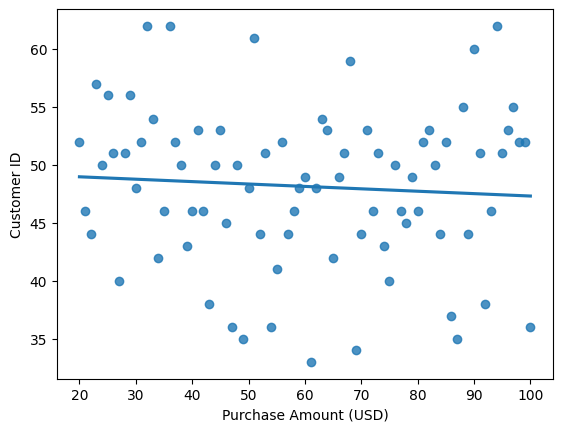

In [19]:
purchase_amnt = df.groupby('Purchase Amount (USD)').count()
sns.regplot(data=purchase_amnt, x=purchase_amnt.index, y='Customer ID', ci=None)

plt.show()

## Impact of discounts and promo codes on purchase behavior

### Impact of discounts on purchase behaviour

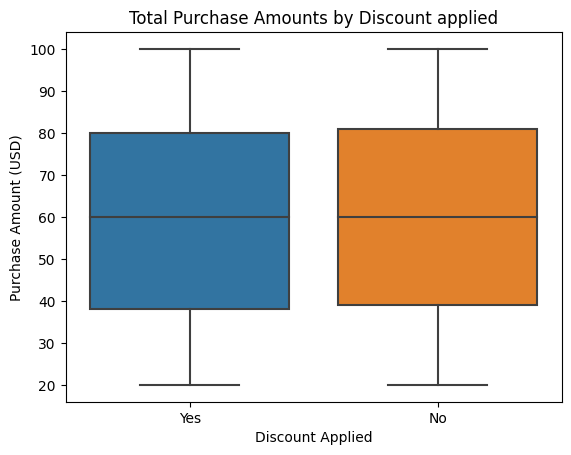

In [34]:
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df)
plt.title('Total Purchase Amounts by Discount applied')
plt.show()

The average purchase amount appears to be almost the same for both those who applied discounts and those who did not.

#### Correlation analysis

In [21]:
df2 = df.copy()
df2 = df2.replace({'Discount Applied':{'Yes':1, 'No':2}})
purchase_amount = df2['Purchase Amount (USD)']
discount_applied = df2['Discount Applied']

correlation_coefficient, p_value = stats.pointbiserialr(discount_applied, purchase_amount)

print(f"Point-Biserial Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Point-Biserial Correlation Coefficient: 0.017798054690021648
P-value: 0.266473720057676


The amount of the purchase and the applied discount appear to have little to no correlation.

### Impact of promo code on purchase behaviour

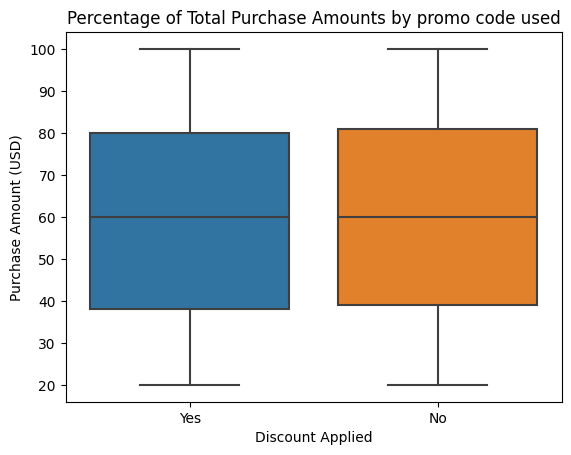

In [33]:
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df)
plt.title('Percentage of Total Purchase Amounts by promo code used')
plt.show()

The average purchase amount appears to be the same for both those who applied promotion code and those who did not.

In [23]:
df2 = df.replace({'Promo Code Used':{'Yes':1, 'No':2}})
purchase_amount = df2['Purchase Amount (USD)']
promo_code_used = df2['Promo Code Used']

correlation_coefficient, p_value = stats.pointbiserialr(promo_code_used, purchase_amount)

print(f"Point-Biserial Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Point-Biserial Correlation Coefficient: 0.017798054690021648
P-value: 0.266473720057676


The amount of the purchase and the applied discount appear to have little to no correlation.

## Correlation between review ratings and purchase amounts.

### Null Hypothesis

There is no relationship between promotion and purchase amounts.

### Altenative Hypothesis

There is a relationship between promotion and purchase amounts.

In [43]:
ratings = df['Review Rating']
correlation_coefficient, p_value = stats.pearsonr(purchase_amount, ratings)
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.03077592307391445
P-value: 0.05463157362476748


There appears to be a tenuous positive correlation. Nonetheless, the p-value indicates that the association is not significant, this suggests that the observed relationship could be due to random chance, and we cannot confidently conclude that the relationship is truly present in the population. Moreover, we can accept the null hypothesis.

# Geographical Analysis:

- Explore regional preferences by analyzing the distribution of purchases across locations.
- Identify any regional variations in product preferences or purchase behavior.

#### Top 5 locations with high purchases

In [63]:
Locations = df.groupby(['Location'])['Location'].count().sort_values(ascending=False)
print(Locations[:5])

Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Name: Location, dtype: int64


#### Top 3 purchased items by location

In [70]:
for i in df.Location.unique():
    subset = df[df['Location'] == i]
    print(i) 
    top_items = subset.groupby('Item Purchased')['Location'].count().sort_values(ascending=False)[:3]
    print(top_items,'\n')

Kentucky
Item Purchased
Sweater    7
Handbag    7
Coat       6
Name: Location, dtype: int64 

Maine
Item Purchased
Shoes      7
Sweater    6
Socks      6
Name: Location, dtype: int64 

Massachusetts
Item Purchased
Boots       6
Dress       6
Backpack    4
Name: Location, dtype: int64 

Rhode Island
Item Purchased
Dress     6
Shorts    5
Pants     5
Name: Location, dtype: int64 

Oregon
Item Purchased
Socks     6
Shirt     6
Blouse    5
Name: Location, dtype: int64 

Wyoming
Item Purchased
Sneakers      6
Shirt         6
Sunglasses    5
Name: Location, dtype: int64 

Montana
Item Purchased
Coat       8
Sweater    7
Jeans      6
Name: Location, dtype: int64 

Louisiana
Item Purchased
Hoodie     8
Jewelry    7
Shirt      6
Name: Location, dtype: int64 

West Virginia
Item Purchased
Coat          8
Sunglasses    8
Handbag       7
Name: Location, dtype: int64 

Missouri
Item Purchased
Sunglasses    6
Sneakers      6
Jewelry       5
Name: Location, dtype: int64 

Arkansas
Item Purchased
Glov

#### Visual analysis

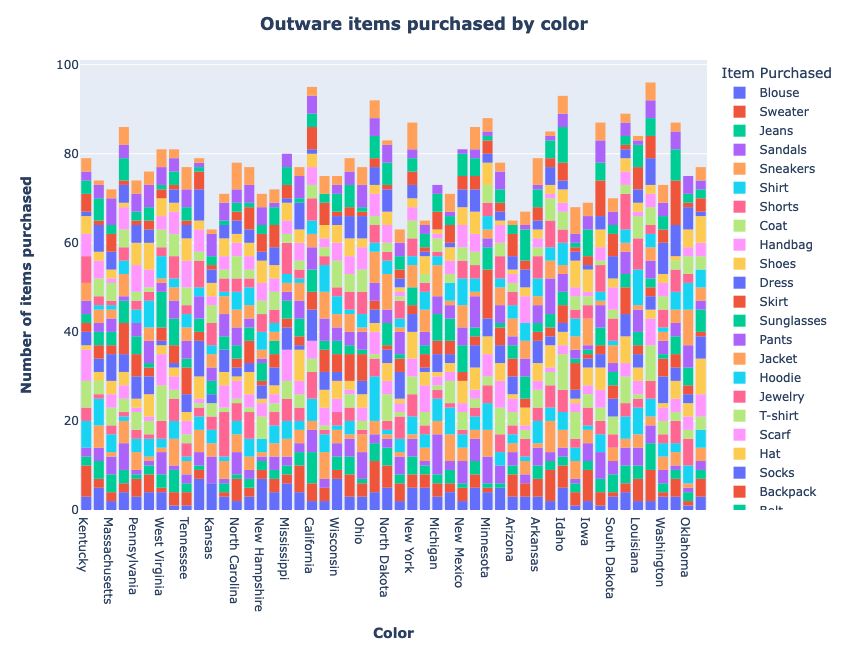

In [46]:
accessories_fig = px.histogram(data_frame = df, x = 'Location', color='Item Purchased')
accessories_fig.update_layout(
        title="<b>Outware items purchased by color<b>",
        title_x=0.5,
        xaxis_title="<b>Color<b>",
        yaxis_title="<b>Number of items purchased<b>",
        autosize=False,
        width=850,
        height=650,
    )

#### Insights

Most purchases are made in Montana, while this is true, preference seem to vary for every location, the most purchased item is skirt which is most popular in Minnesota which does not appear in the top 5 of the most purchasses

# Customer Loyalty:

- Analyze the frequency of purchases to identify loyal customers.
- Explore the relationship between subscription status and other variables (e.g., purchase amount, frequency of purchases).

## Frequency of purchases

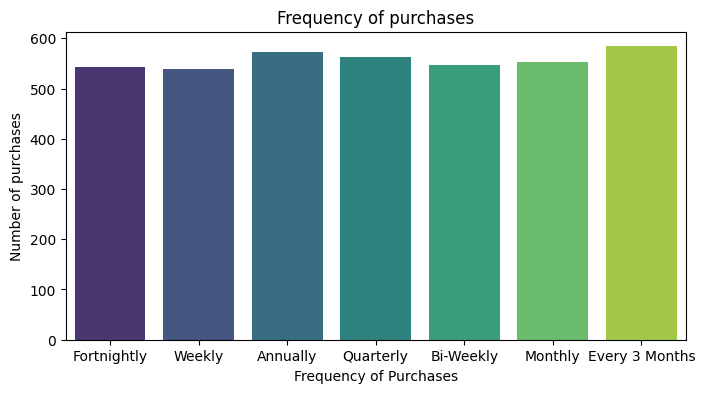

In [80]:
plt.figure(figsize=(8, 4))
sns.countplot(data = df, x = 'Frequency of Purchases', palette= 'viridis')
plt.title('Frequency of purchases')
plt.ylabel('Number of purchases')
plt.show()

A considerable proportion of customers make purchases on a regular basis, specifically every three months. This consistent pattern of transactions could indicate a loyal customer base.

In [82]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'AgeGroup'],
      dtype='object')

## Explore the relationship between subscription status and other variables (e.g., purchase amount, frequency of purchases).


In [86]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'AgeGroup'],
      dtype='object')

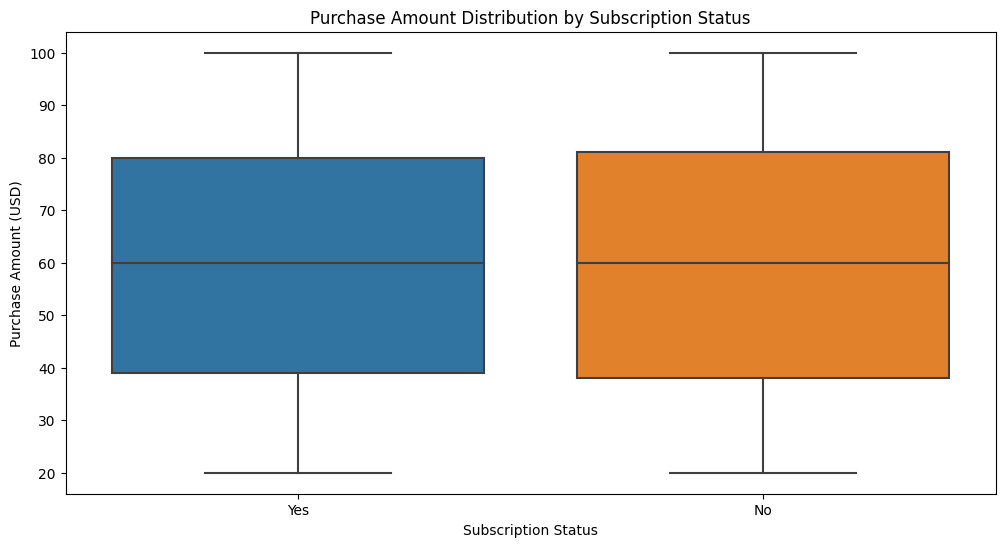

In [90]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount Distribution by Subscription Status')
plt.show()

Those who didn't subscribe appear to have spent a higher purchasing amount.

# Conclusion

Clothes are the most popular category, with jewelry, blouse, and pants being the top-selling items.Some products perform well in one season but poorly in another. A considerable proportion of customers make purchases every three months. Average purchase amounts are similar for those who applied discounts or promotion codes and those who did not. Montana has the highest number of purchases, but preferences vary by location. Little to no correlation is observed between purchase amount and applied discount. A tenuous positive correlation is observed between raview ratings and purchase amount, but it's not statistically significant.